In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.max_rows', 110)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
# 10 functions with most data in test set (last 3 days)
workload_ids = [1, 7, 21, 31, 37, 50, 55, 56, 69, 71]

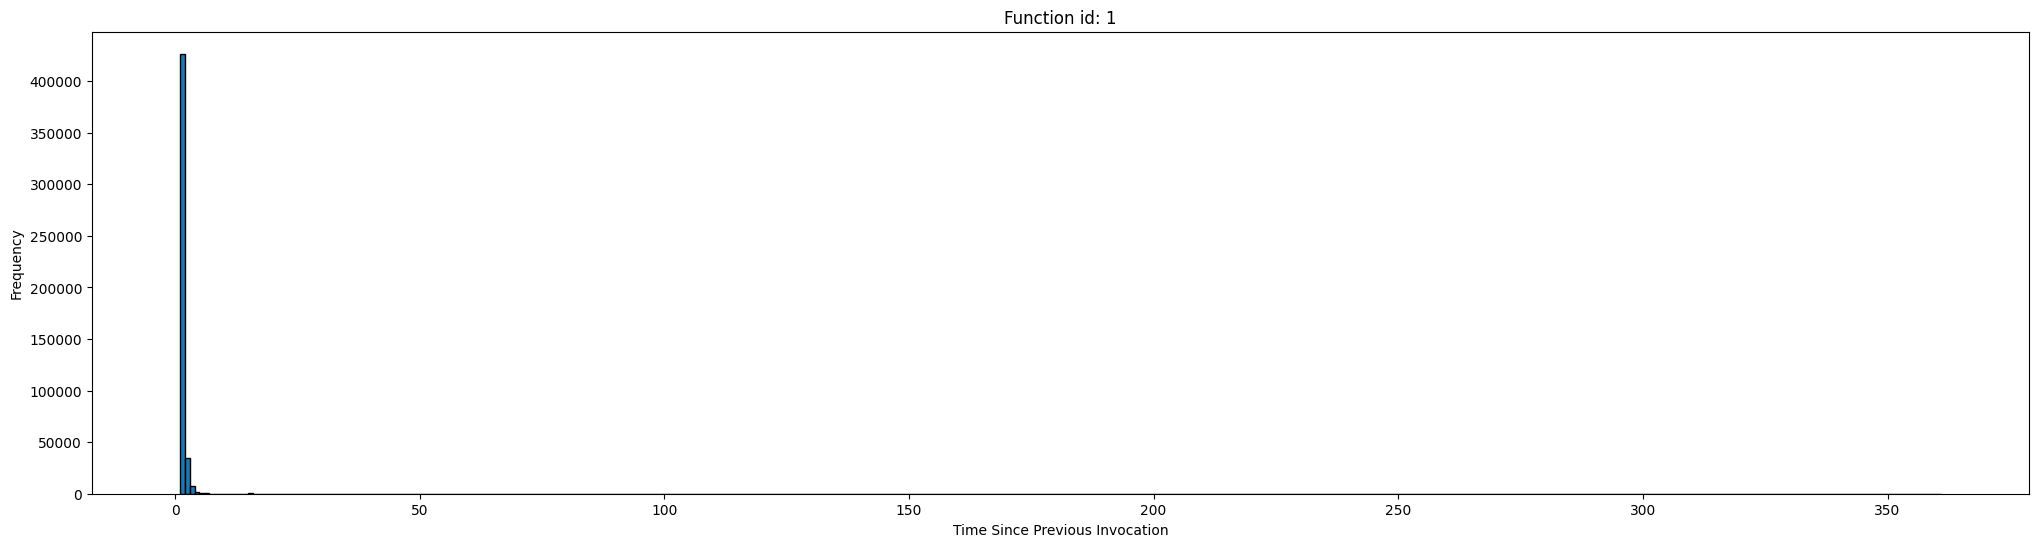

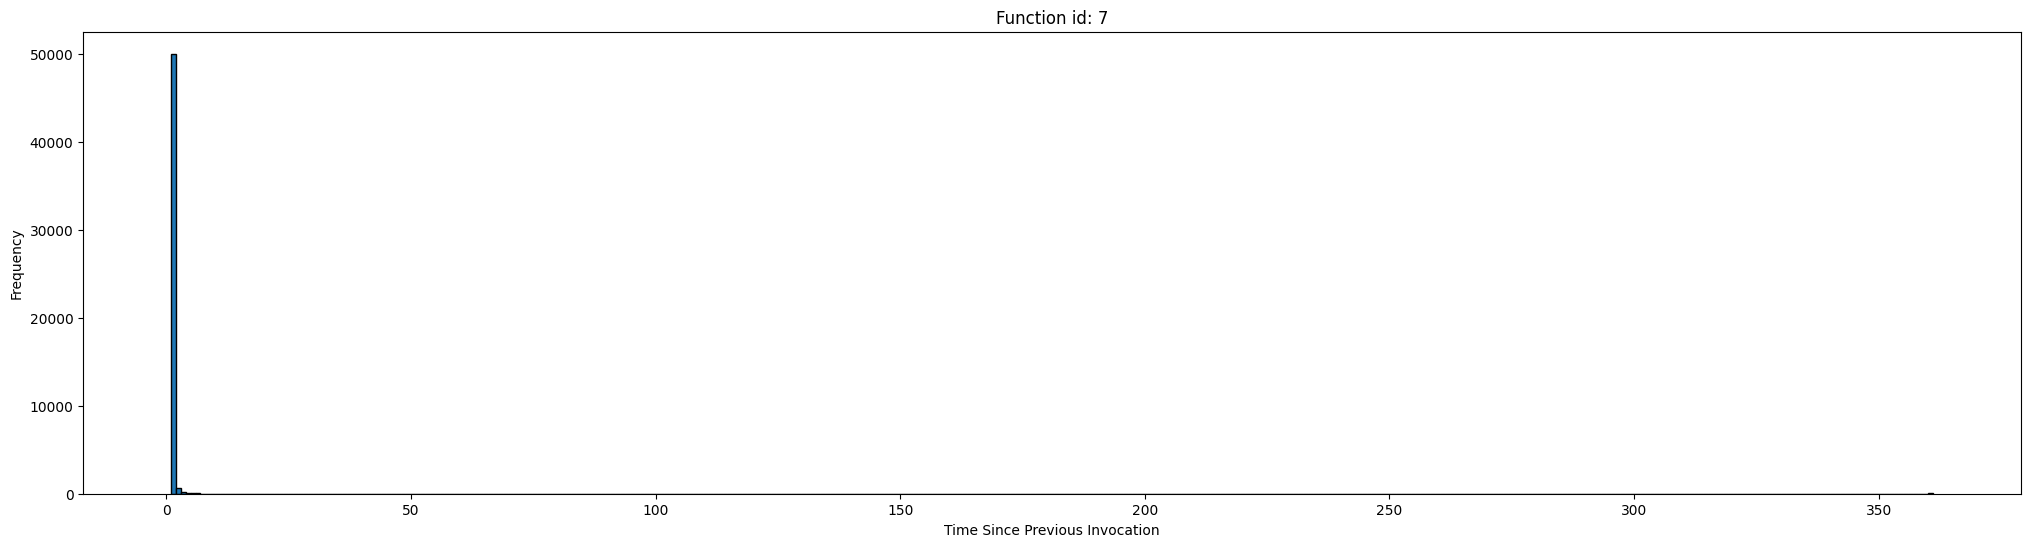

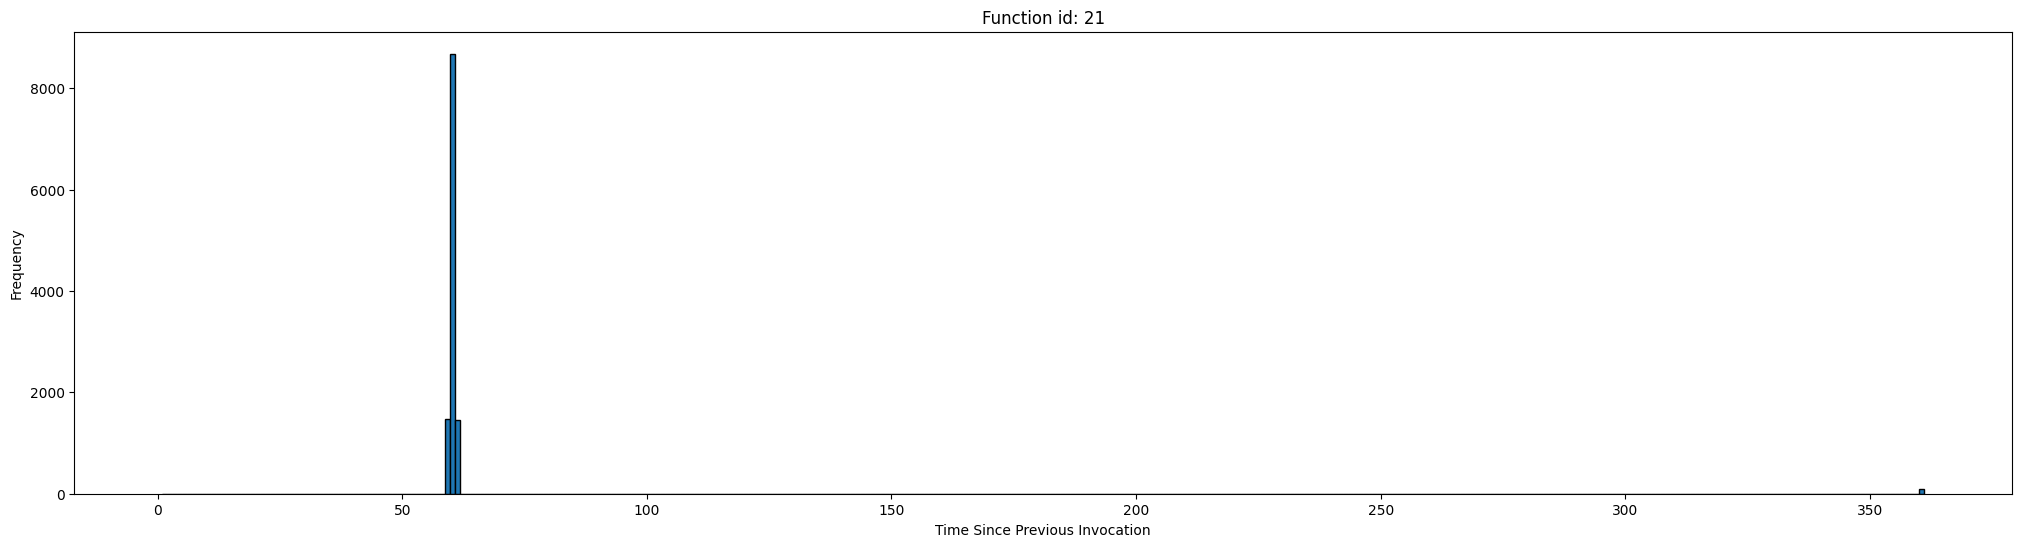

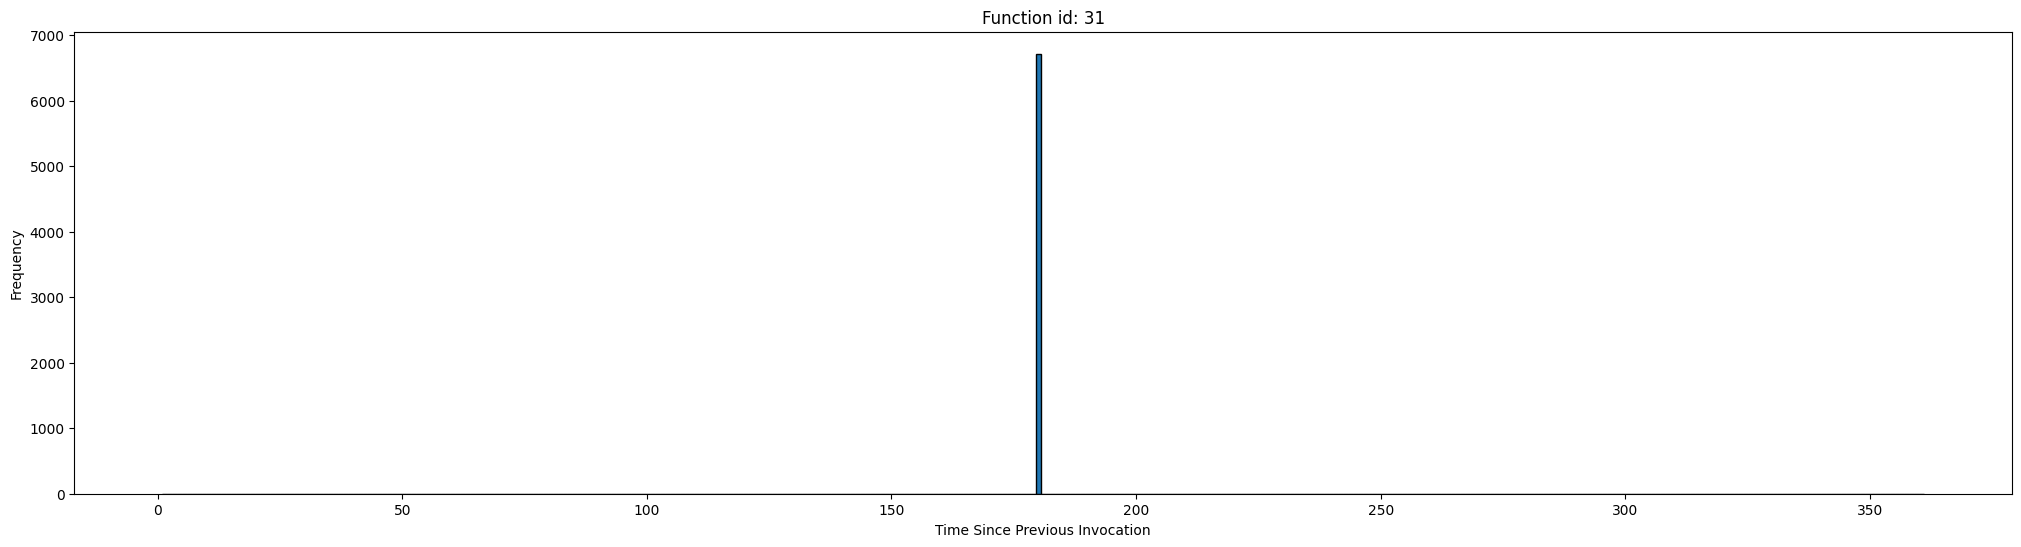

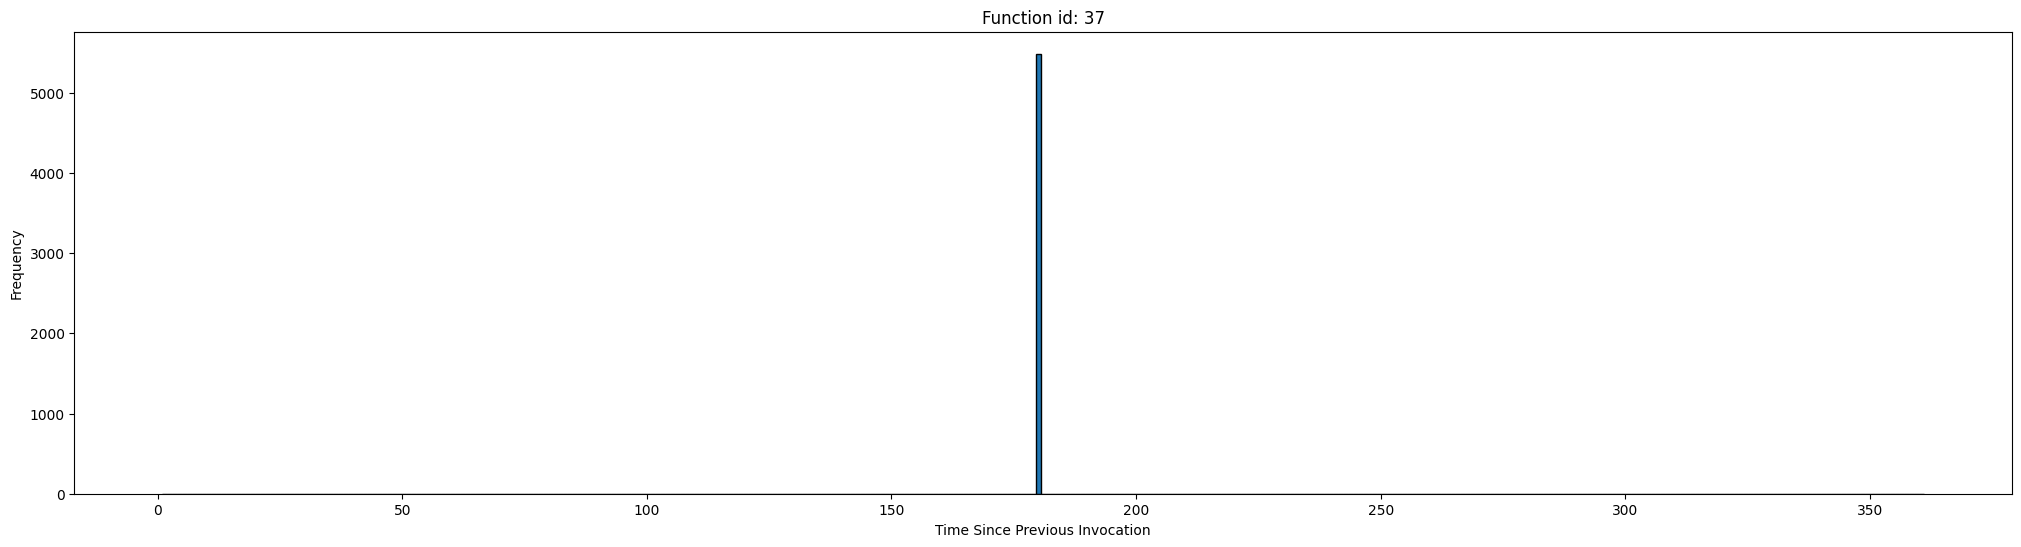

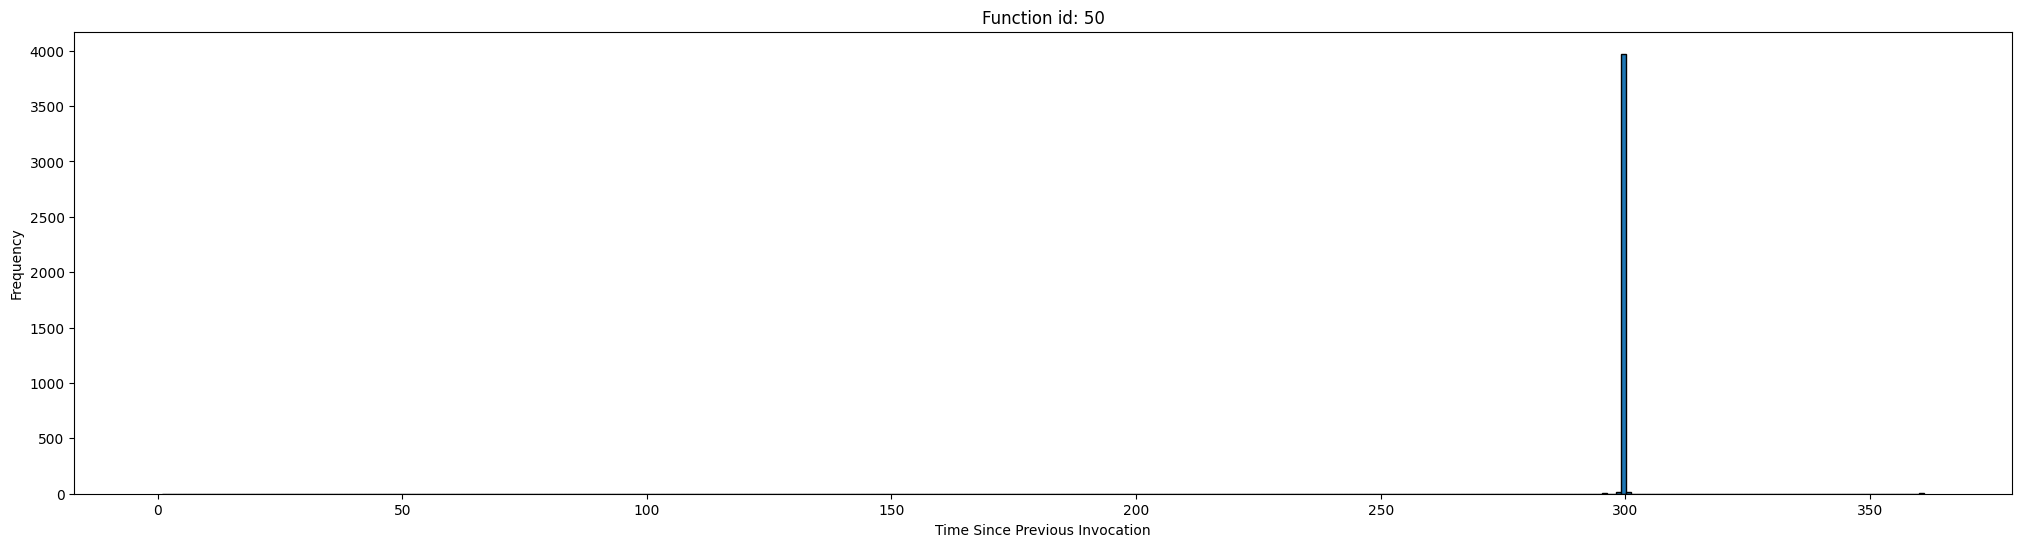

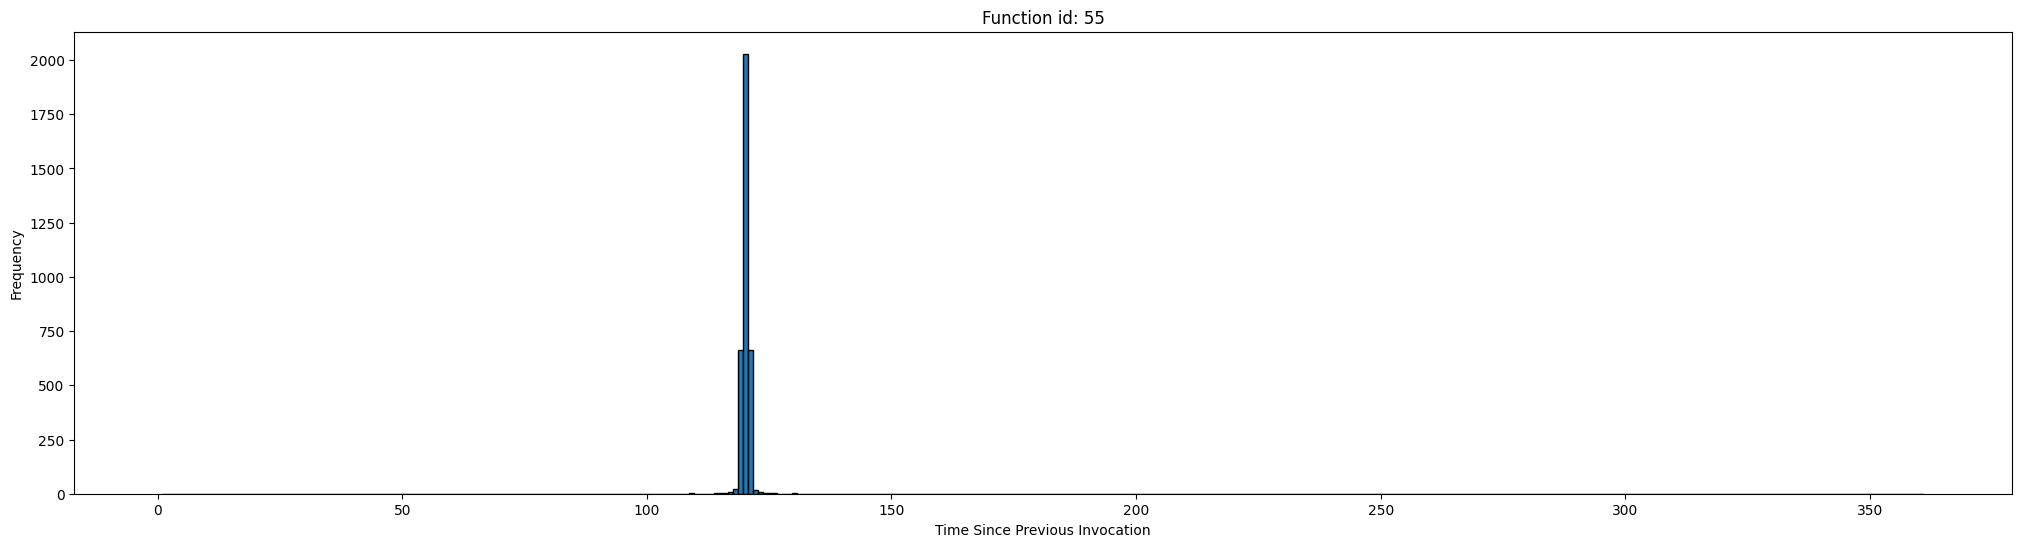

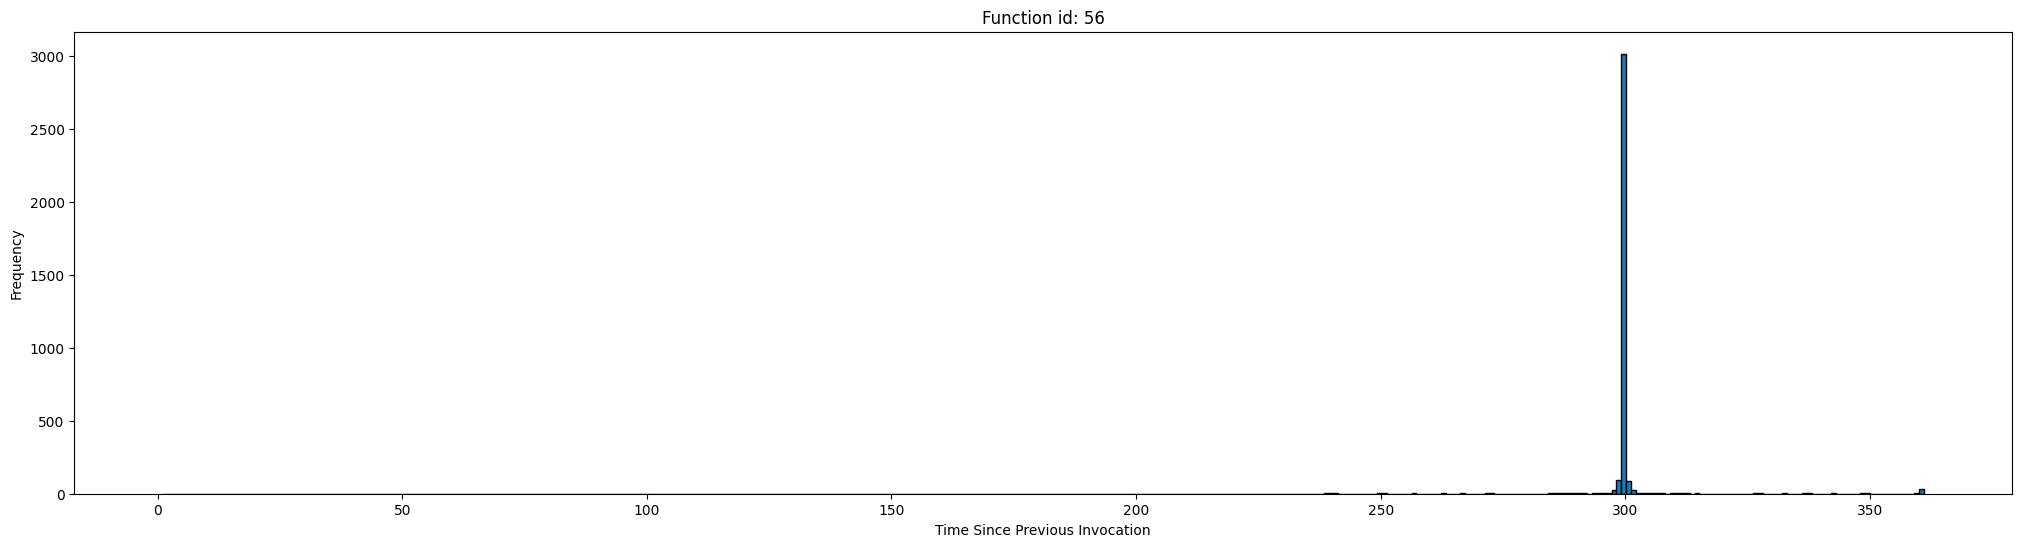

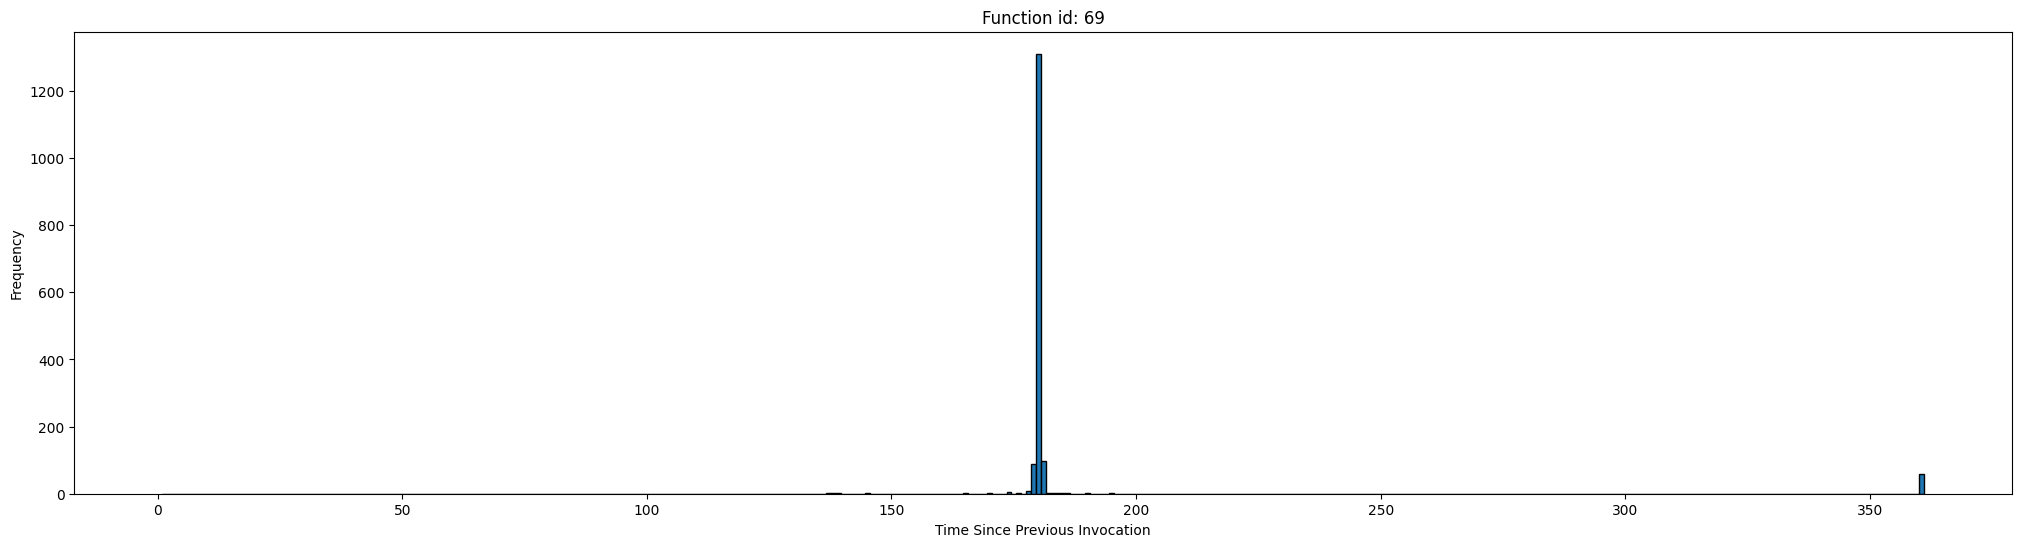

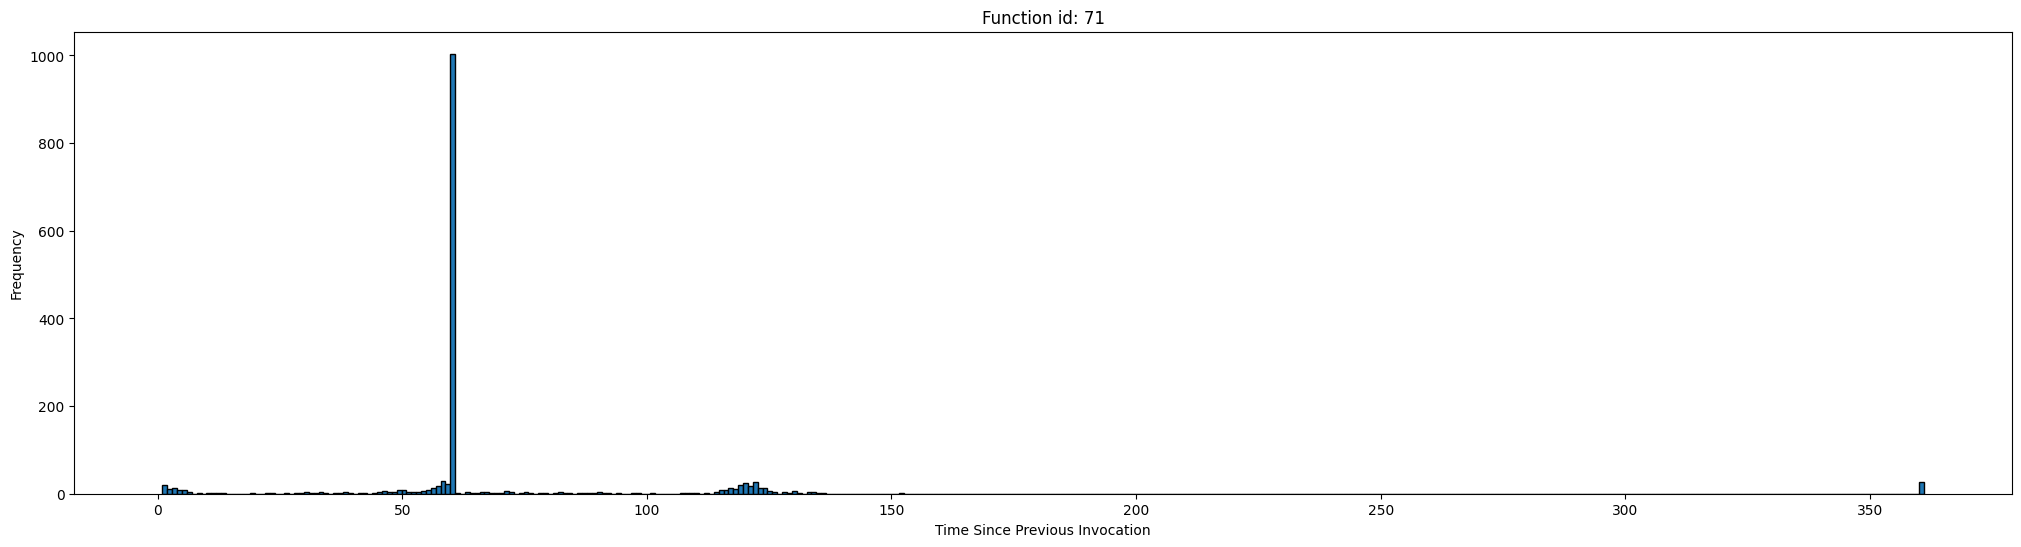

In [7]:
for i in workload_ids:
    data = pd.read_csv(f'../../data/training_data/{i}.txt', delimiter=',')
    data.drop(columns=["Unnamed: 0"], inplace=True)
    # Convert values above 360 to 360
    data["time_since_prev_invocation"] = data["time_since_prev_invocation"].apply(lambda x: min(x, 361))

    recurring_values = []
    previous_value = None

    for index, row in data.iterrows():
        if row["time_since_prev_invocation"] == 1:  # If the value resets to 1
            if previous_value is not None:
                recurring_values.append(previous_value)
        previous_value = row["time_since_prev_invocation"]

    plt.figure(figsize=(25, 6))
    plt.hist(recurring_values, bins=361, range=(1, 361), edgecolor="black")
    plt.xlabel("Time Since Previous Invocation")
    plt.ylabel("Frequency")
    plt.title(f"Function id: {i}")
    #plt.ylim(0, 200000)
    plt.show()